In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#setting file path shortcut
path = r'C:\Users\evras\Desktop\Data Analysis\Immersion\A4 Python\Instacart Basket Analysis'

In [3]:
#setting up one for the vixualizations
viz_path= r'C:\Users\evras\Desktop\Data Analysis\Immersion\A4 Python\Instacart Basket Analysis\04 Analysis\Viz\4.10'

### #1 importing the merged file

In [4]:
#importing files
df=pd.read_pickle(os.path.join(path,'02 Data', 'Preped Data', 'opc_no_pii.pkl'))

In [5]:
df.head(100)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,user_state,user_age,date_joined,user_dependants,user_fam_status,user_income,mean_price,spending_flag
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,Regular Busy,Average Orders,Alabama,31,2/17/2019,3,married,40423,6.367797,low spender
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,Second Slowest Day,Average Orders,Alabama,31,2/17/2019,3,married,40423,6.367797,low spender
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,Second Slowest Day,Most orders,Alabama,31,2/17/2019,3,married,40423,6.367797,low spender
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,Slowest Day,Average Orders,Alabama,31,2/17/2019,3,married,40423,6.367797,low spender
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,Slowest Day,Most orders,Alabama,31,2/17/2019,3,married,40423,6.367797,low spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3317979,15,5,4,15,17.0,14715,7,4.0,low-range product,Slowest Day,Most orders,Indiana,69,6/3/2019,0,divorced/widowed,54313,3.980556,low spender
96,2685110,15,7,1,11,17.0,14715,7,4.0,low-range product,Second Busiest Day,Most orders,Indiana,69,6/3/2019,0,divorced/widowed,54313,3.980556,low spender
97,887727,15,9,2,13,7.0,14715,7,4.0,low-range product,Regular Busy,Most orders,Indiana,69,6/3/2019,0,divorced/widowed,54313,3.980556,low spender
98,2600170,15,11,2,9,14.0,14715,7,4.0,low-range product,Regular Busy,Average Orders,Indiana,69,6/3/2019,0,divorced/widowed,54313,3.980556,low spender


### #2 PII consideration
#### In the intial customer data set, there were first and last names as well as genders. We got rid of those already (see DI Task 4.10 prep). There is also the State portion to take into consideration, however I feel that without names or even genders attatched it would be nearly impossible to derive anything meaningful about the customers. One MIGHT be able to narrow it down due to income and family status being included, but it would be difficult. Still both of those things are pieces of information that I'm sure the customer wouldn't just want out in the open, so personaly I feel like even at that level this data set requires careful consideration when looking to if we should let any of it be public.

### #3 Regions and Cross Tabbing

In [6]:
#making life a little easier with some copy and past action, stop me from misspelling the names haha
#I could probably just copy it off the wikipedia page, but I also just want to see if I can do this right
states=df['user_state'].unique()
states.sort()
print(states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [7]:
#Turns out I could do it right, go me.
#I'm gonna set a few lists here and then use them with .isin for the actual flags.
#This is just a readability thing, honestly.
region1=['Maine', 'New Hampshire','Vermont','Massachusetts','Rhode Island', 'Connecticut','New York','Pennsylvania','New jersy']
region2=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota', 'South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
region3=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Dakota','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
region4=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [8]:
df.loc[df['user_state'].isin(region1),'user_region']='Region 1'
df.loc[df['user_state'].isin(region2),'user_region']='Region 2'
df.loc[df['user_state'].isin(region3),'user_region']='Region 3'
df.loc[df['user_state'].isin(region4),'user_region']='Region 4'

In [9]:
#let's see if it worked!
df['user_region'].value_counts()

Region 3    10787068
Region 4     8291679
Region 2     6962416
Region 1     5094293
Name: user_region, dtype: int64

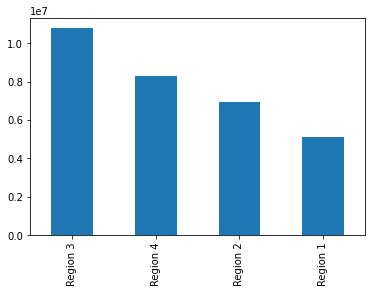

In [10]:
#It did! Lots of folks in region 3. Makes sense though, it has the most states in it
regionsbar=df['user_region'].value_counts().plot.bar()

In [11]:
regionsbar.figure.savefig(os.path.join(path,'04 Analysis','4_9_regionsbar.png'))

In [12]:
#now lets see who has the most big spenders
region_cross=pd.crosstab(df['user_region'],df['spending_flag'],dropna=False)
region_cross

spending_flag,high spender,low spender
user_region,,
Region 1,16645,5077648
Region 2,26735,6935681
Region 3,40765,10746303
Region 4,31200,8260479


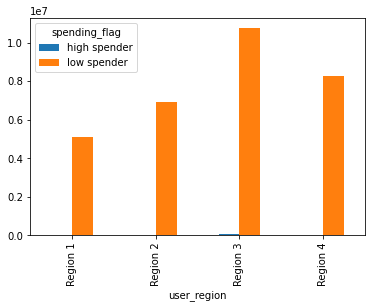

In [13]:
# In all 4 regions, high spenders make up about .4% of the total customer base.
regions_cross=region_cross.plot.bar()

In [14]:
regions_cross.figure.savefig(os.path.join(path,'04 Analysis','4_9_Region_Cross.png'))

In [15]:
#looking at the counts of low and high spenders this remains true.
df['spending_flag'].value_counts()

low spender     32280141
high spender      119591
Name: spending_flag, dtype: int64

##### Well, it would seem that while the actual numbers change between regions a fair bit, the percent of the total customer base in each region which counts as a 'high spender' is consistent. So I would say that there really is no meaninful difference in spending in the regions. Unless you are looking at raw dollars at which point Region 3 comes out on top in every category.

### #4 low-activity customers

In [16]:
#adding in a column that has the maximum number of orders based on user_id
df['max_order']=df.groupby(['user_id'])['order_number'].transform(np.max)

In [17]:
df['max_order'].min()

1

In [18]:
df['max_order'].max()

99

In [19]:
#setting a new variable that just has customers with five or more orders
df_nolow=df[df['max_order']>=5]

In [20]:
#checking that the lowest number is five
df_nolow['max_order'].min()

5

In [21]:
#looks good, it's still way too large to do as a csv file so I'll export it as a pickle I guess.
df_nolow.to_pickle(os.path.join(path,'02 Data','Preped Data','NoLowFrequencyCustomers.pkl'))

### #5

In [22]:
# I think I'll put in a few categories. 
# Parents. department 18 stuff=babies, just a parent if they have dependants (under the assumption these people have spoucecs who have incomes)
# If they don't buy from 12,16,or 20 they're probably at least vegitarian
# if they buy stuff from dep 7 then they drink
# 8 means pets.
# I'll do income levels, and it's based on the PEW research center's system. That being that people between 67% and 200% of the median income are concidered middle class
# the mean for 2019 was 68,703. So we have 46,031.01 to 137,406. We'll call it 46k to 137k.
# Age groups will be youth=15-24, adult 25-64, and seniors 64+. This is actually canada's system but the US one is almost identical but doesn't have labels
# Once I get a chunk of code that can do what I need it to, I'll probably just end up coping and pasting it a few times to set up the categories.
# I'd set it a defined function but I think I'll need to tweak it along the way too much for that to be helpful.

#### Sobriety

In [23]:
#Ok let's start with sobriety since that's an easy enough one to check along the way.
# so we'll start with the flag
df.loc[df['department_id']==5,'sober_flag']=0
df.loc[df['department_id']!=5,'sober_flag']=1

In [24]:
# now we need to make sure that the flags are grouped and applied based on user_id
df_sob=df.groupby(['user_id'])['user_id','sober_flag'].sum()

<ipython-input-24-1dd028e95955>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sob=df.groupby(['user_id'])['user_id','sober_flag'].sum()


In [25]:
df_sob.describe()

,sober_flag
count,206209.000000
mean,156.375503
std,203.675790
min,0.000000
25%,39.000000
50%,83.000000
75%,187.000000
max,3704.000000


In [26]:
df_sob.shape

(206209, 1)

In [27]:
# double check that we have those numbers in there
df_sob['sober_flag'].value_counts()

24.0      1730
32.0      1729
33.0      1728
30.0      1716
25.0      1705
          ... 
2546.0       1
1601.0       1
1862.0       1
1434.0       1
1650.0       1
Name: sober_flag, Length: 1707, dtype: int64

In [28]:
#ok cool, now we just need to add in the column with the strings
df_sob.loc[df_sob['sober_flag']==0,'user_sobriety']='Sober'

In [29]:
df_sob.loc[df_sob['sober_flag']>=1,'user_sobriety']='Not Sober'

In [30]:
#now to drop the flag
df_sob=df_sob.drop(columns='sober_flag')

In [31]:
#make sure it's gone
df_sob.head()

,user_sobriety
user_id,
1,Not Sober
10,Not Sober
100,Not Sober
1000,Not Sober
10000,Not Sober


In [32]:
df_sob.value_counts()

user_sobriety
Not Sober        206150
Sober                59
dtype: int64

In [33]:
#check that the merge will work first...
pd.merge(df,df_sob,on=['user_id','user_id'],indicator=True)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,user_dependants,user_fam_status,user_income,mean_price,spending_flag,user_region,max_order,sober_flag,user_sobriety,_merge
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober,both
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober,both
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober,both
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober,both
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,156685,106143,26,4,23,5.0,19675,7,10.7,mid-range product,...,0,single,53755,10.700000,high spender,Region 4,26,1.0,Not Sober,both
32399728,484769,66343,1,6,11,0.0,47210,12,8.1,mid-range product,...,3,married,46151,8.100000,low spender,Region 3,4,1.0,Not Sober,both
32399729,1561557,66343,2,1,11,30.0,47210,12,8.1,mid-range product,...,3,married,46151,8.100000,low spender,Region 3,4,1.0,Not Sober,both
32399730,276317,66343,3,6,15,19.0,47210,12,8.1,mid-range product,...,3,married,46151,8.100000,low spender,Region 3,4,1.0,Not Sober,both


In [34]:
#looking good! now to do it for real
df=df.merge(df_sob,on='user_id')

In [35]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,date_joined,user_dependants,user_fam_status,user_income,mean_price,spending_flag,user_region,max_order,sober_flag,user_sobriety
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,1.0,Not Sober


In [36]:
#finally we'll drop the flag column here and move on
df=df.drop(columns='sober_flag')

#### Parents!

In [37]:
#parents
#we classify who is and isn't a parent. As well as potentially expectant parents
df.loc[df['user_dependants']>0,'parental_flag']=1
df.loc[df['user_dependants']<1,'parental_flag']=0
#likewise I'll set up a second set for the expecting parents as the method I'm using isn't terribly condusive to non-binary outcomes
df.loc[(df['user_dependants']==0)&(df['department_id']==18),'expecting']=1
df.loc[df['user_dependants']>=1,'expecting']=0

In [38]:
#now for grouping
df_par=df.groupby(['user_id'])['parental_flag','expecting'].sum()

<ipython-input-38-f3e69375497a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_par=df.groupby(['user_id'])['parental_flag','expecting'].sum()


In [39]:
#checking totals
df_par['parental_flag'].value_counts()

0.0       51602
31.0       1298
30.0       1288
25.0       1285
33.0       1283
          ...  
1680.0        1
1217.0        1
1191.0        1
1378.0        1
2577.0        1
Name: parental_flag, Length: 1623, dtype: int64

In [40]:
df_par['expecting'].value_counts()

0.0      197786
1.0        2227
2.0        1126
3.0         653
4.0         504
          ...  
77.0          1
267.0         1
306.0         1
137.0         1
226.0         1
Name: expecting, Length: 193, dtype: int64

In [41]:
df_par.shape

(206209, 2)

In [42]:
#ok cool, now we just need to add in the column with the strings
df_par.loc[df_par['parental_flag']==0,'user_parent_status']='Not Parent'
df_par.loc[df_par['parental_flag']>=1,'user_parent_status']='Parent'
df_par.loc[df_par['expecting']>=1,'user_parent_status']='Expecting'

In [43]:
df_par.head()

,parental_flag,expecting,user_parent_status
user_id,,,
1,59.0,0.0,Parent
10,143.0,0.0,Parent
100,27.0,0.0,Parent
1000,103.0,0.0,Parent
10000,0.0,0.0,Not Parent


In [44]:
df_par=df_par.drop(columns=['parental_flag','expecting'])

In [45]:
df_par.head()

,user_parent_status
user_id,
1,Parent
10,Parent
100,Parent
1000,Parent
10000,Not Parent


In [46]:
#practice merge!
pd.merge(df,df_par,on=['user_id','user_id'],indicator=True)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,user_income,mean_price,spending_flag,user_region,max_order,user_sobriety,parental_flag,expecting,user_parent_status,_merge
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,1.0,0.0,Parent,both
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,1.0,0.0,Parent,both
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,1.0,0.0,Parent,both
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,1.0,0.0,Parent,both
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,1.0,0.0,Parent,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,156685,106143,26,4,23,5.0,19675,7,10.7,mid-range product,...,53755,10.700000,high spender,Region 4,26,Not Sober,0.0,NaN,Not Parent,both
32399728,484769,66343,1,6,11,0.0,47210,12,8.1,mid-range product,...,46151,8.100000,low spender,Region 3,4,Not Sober,1.0,0.0,Parent,both
32399729,1561557,66343,2,1,11,30.0,47210,12,8.1,mid-range product,...,46151,8.100000,low spender,Region 3,4,Not Sober,1.0,0.0,Parent,both
32399730,276317,66343,3,6,15,19.0,47210,12,8.1,mid-range product,...,46151,8.100000,low spender,Region 3,4,Not Sober,1.0,0.0,Parent,both


In [47]:
#real merge!
df=df.merge(df_par,on='user_id')
#drop them extra columns!
df=df.drop(columns=['parental_flag','expecting'])

In [48]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,date_joined,user_dependants,user_fam_status,user_income,mean_price,spending_flag,user_region,max_order,user_sobriety,user_parent_status
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,2/17/2019,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent


#### Vegitarians

In [49]:
#From this point forward I'm basically just C&Ping everything so I don't have to type it out. So the comments will be constant since they're just there to help me keep track

In [50]:
#ok next up, vegitarians.
#set up a little filter
animal_prods=[12,16,20]
#apply the filter!
df.loc[df['department_id'].isin(animal_prods),'diet_flag']=1
df.loc[~df['department_id'].isin(animal_prods),'diet_flag']=0

In [51]:
# now we need to make sure that the flags are grouped and applied based on user_id
df_veg=df.groupby(['user_id'])['user_id','diet_flag'].sum()

<ipython-input-51-a4b2c6af82d7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_veg=df.groupby(['user_id'])['user_id','diet_flag'].sum()


In [52]:
# checking to make sure it is grouped correctly, number of rows should be 206209
# that is the total number of unique users
df_veg.shape

(206209, 1)

In [53]:
df_veg.head()

,diet_flag
user_id,
1,13.0
10,44.0
100,10.0
1000,35.0
10000,334.0


In [54]:
#ok cool, now we just need to add in the column with the strings
df_veg.loc[df_veg['diet_flag']==0,'user_diet']='Vegitarian'
df_veg.loc[df_veg['diet_flag']>=1,'user_diet']='Not Vegitarian'

In [55]:
#now to drop the flag
df_veg=df_veg.drop(columns='diet_flag')

In [56]:
#makingsure it's gone
df_veg.head()

,user_diet
user_id,
1,Not Vegitarian
10,Not Vegitarian
100,Not Vegitarian
1000,Not Vegitarian
10000,Not Vegitarian


In [57]:
#checking the numbers
df_veg.value_counts()

user_diet     
Not Vegitarian    195410
Vegitarian         10799
dtype: int64

In [58]:
#check that the merge will work first...
pd.merge(df,df_veg,on=['user_id','user_id'],indicator=True)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,user_income,mean_price,spending_flag,user_region,max_order,user_sobriety,user_parent_status,diet_flag,user_diet,_merge
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,0.0,Not Vegitarian,both
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,0.0,Not Vegitarian,both
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,0.0,Not Vegitarian,both
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,0.0,Not Vegitarian,both
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,0.0,Not Vegitarian,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,156685,106143,26,4,23,5.0,19675,7,10.7,mid-range product,...,53755,10.700000,high spender,Region 4,26,Not Sober,Not Parent,0.0,Vegitarian,both
32399728,484769,66343,1,6,11,0.0,47210,12,8.1,mid-range product,...,46151,8.100000,low spender,Region 3,4,Not Sober,Parent,1.0,Not Vegitarian,both
32399729,1561557,66343,2,1,11,30.0,47210,12,8.1,mid-range product,...,46151,8.100000,low spender,Region 3,4,Not Sober,Parent,1.0,Not Vegitarian,both
32399730,276317,66343,3,6,15,19.0,47210,12,8.1,mid-range product,...,46151,8.100000,low spender,Region 3,4,Not Sober,Parent,1.0,Not Vegitarian,both


In [59]:
#looking good! now to do it for real
df=df.merge(df_veg,on='user_id')

In [60]:
#Now we'll drop the flag column here and move on
df=df.drop(columns=['diet_flag'])

In [61]:
#ok time to check it
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,user_dependants,user_fam_status,user_income,mean_price,spending_flag,user_region,max_order,user_sobriety,user_parent_status,user_diet
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,3,married,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian


#### Pets!

In [62]:
#pets!!
df.loc[df['department_id']==8,'pet_flag']=1
df.loc[df['department_id']!=8,'pet_flag']=0

In [63]:
# now we need to make sure that the flags are grouped and applied based on user_id
df_pet=df.groupby(['user_id'])['user_id','pet_flag'].sum()

<ipython-input-63-ccc4615a374f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pet=df.groupby(['user_id'])['user_id','pet_flag'].sum()


In [64]:
# checking to make sure it is grouped correctly, number of rows should be 206209
# that is the total number of unique users
df_pet.shape

(206209, 1)

In [65]:
#ok cool, now we just need to add in the column with the strings
df_pet.loc[df_pet['pet_flag']==0,'user_pets']='No Pets'
df_pet.loc[df_pet['pet_flag']>=1,'user_pets']='Has Pets'

In [66]:
#now to drop the flag
df_pet=df_pet.drop(columns='pet_flag')

In [67]:
#make sure it's gone
df_pet.head()

,user_pets
user_id,
1,No Pets
10,No Pets
100,No Pets
1000,No Pets
10000,No Pets


In [68]:
df_pet.value_counts()

user_pets
No Pets      191223
Has Pets      14986
dtype: int64

In [69]:
#check that the merge will work first...
pd.merge(df,df_pet,on=['user_id','user_id'],indicator=True)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,mean_price,spending_flag,user_region,max_order,user_sobriety,user_parent_status,user_diet,pet_flag,user_pets,_merge
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,0.0,No Pets,both
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,0.0,No Pets,both
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,0.0,No Pets,both
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,0.0,No Pets,both
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,0.0,No Pets,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,156685,106143,26,4,23,5.0,19675,7,10.7,mid-range product,...,10.700000,high spender,Region 4,26,Not Sober,Not Parent,Vegitarian,0.0,No Pets,both
32399728,484769,66343,1,6,11,0.0,47210,12,8.1,mid-range product,...,8.100000,low spender,Region 3,4,Not Sober,Parent,Not Vegitarian,0.0,No Pets,both
32399729,1561557,66343,2,1,11,30.0,47210,12,8.1,mid-range product,...,8.100000,low spender,Region 3,4,Not Sober,Parent,Not Vegitarian,0.0,No Pets,both
32399730,276317,66343,3,6,15,19.0,47210,12,8.1,mid-range product,...,8.100000,low spender,Region 3,4,Not Sober,Parent,Not Vegitarian,0.0,No Pets,both


In [70]:
#looking good! now to do it for real
df=df.merge(df_pet,on='user_id')

In [71]:
#next we'll drop the flag column here and move on
df=df.drop(columns='pet_flag')

#### Income

In [72]:
#since this is all based around one set of variables I don't need to do all the rigamorll from the others. This should be pretty straight forward.
#under 46k is low, over 137k us high, in the middle is malcome
#now we set it up so the three groups are defined and do the .loc as an if/else
df.loc[df['user_income']<46000,'income_flag']=0
df.loc[(df['user_income']>=46000)&(df['user_income']<=137000),'income_flag']=1
#set up a second thing for high income...
df.loc[df['user_income']>137000,'high_income_flag']=1
df.loc[df['user_income']<=137000,'high_income_flag']=0

In [73]:
#and it's all the same rodeo from here on out kids
df_income=df.groupby(['user_id'])['income_flag','high_income_flag'].sum()

<ipython-input-73-71cd9c199955>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_income=df.groupby(['user_id'])['income_flag','high_income_flag'].sum()


In [74]:
df_income.shape

(206209, 2)

In [75]:
df_income.loc[df_income['income_flag']==0,'user_income_level']='Low Income'
df_income.loc[df_income['income_flag']>=1,'user_income_level']='Medium Income'
df_income.loc[df_income['high_income_flag']>=1,'user_income_level']='High Income'

In [76]:
df_income=df_income.drop(columns=['income_flag','high_income_flag'])
df_income.head()

,user_income_level
user_id,
1,Low Income
10,Medium Income
100,High Income
1000,Medium Income
10000,Medium Income


In [77]:
df_income.value_counts()

user_income_level
Medium Income        140835
High Income           37510
Low Income            27864
dtype: int64

In [78]:
df=df.merge(df_income, on='user_id')

In [79]:
df=df.drop(columns=['income_flag','high_income_flag'])

In [80]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,user_income,mean_price,spending_flag,user_region,max_order,user_sobriety,user_parent_status,user_diet,user_pets,user_income_level
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,40423,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income


In [81]:
df_income.shape

(206209, 1)

#### Age Groups!

In [82]:
#last but not least, age groups.
#if I wasn't using the extra DF from these as a way to properly break down the demographics later, I wouldn't do this in such a complicated way
#but I need that DF to be accurate
df.loc[(df['user_age']>=15)&(df['user_age']<25),'age_flag']=0
df.loc[(df['user_age']>=25)&(df['user_age']<64),'age_flag']=1

df.loc[df['user_age']>=64,'old_age_flag']=1
df.loc[df['user_age']<64,'old_age_flag']=0

In [83]:
df_age=df.groupby(['user_id'])['age_flag','old_age_flag'].sum()

<ipython-input-83-a3acd0543058>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age=df.groupby(['user_id'])['age_flag','old_age_flag'].sum()


In [84]:
df_age.value_counts()

age_flag  old_age_flag
0.0       0.0             22560
25.0      0.0              1100
33.0      0.0              1068
32.0      0.0              1054
29.0      0.0              1051
                          ...  
0.0       1609.0              1
          1618.0              1
1173.0    0.0                 1
0.0       1623.0              1
3637.0    0.0                 1
Length: 2944, dtype: int64

In [85]:
df_age.loc[df_age['age_flag']==0,'user_age_group']='Youth'
df_age.loc[df_age['age_flag']>=1,'user_age_group']='Adult'
df_age.loc[df_age['old_age_flag']>=1,'user_age_group']='Senior'

In [86]:
df_age=df_age.drop(columns=['age_flag','old_age_flag'])
df_age.value_counts()

user_age_group
Adult             125677
Senior             57972
Youth              22560
dtype: int64

In [87]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,spending_flag,user_region,max_order,user_sobriety,user_parent_status,user_diet,user_pets,user_income_level,age_flag,old_age_flag
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0


In [88]:
#df=df.drop(columns=['age_flag','old-age_flag','old_age_flag'])

In [89]:
df=df.merge(df_age, on='user_id')

In [90]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,user_region,max_order,user_sobriety,user_parent_status,user_diet,user_pets,user_income_level,age_flag,old_age_flag,user_age_group
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0,Adult
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0,Adult
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0,Adult
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0,Adult
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,1.0,0.0,Adult


##### That should be enough for marketing to play with.

### #6 demographic charts

In [92]:
# ok so I'm going to do two things. First I'm going to set up some variables, the names of which will be descriptive so I don't get mixed up
parental_status=df_par
diet=df_veg
sobriety=df_sob
pet=df_pet
income_level=df_income
age_group=df_age

In [93]:
parental_status.value_counts()

user_parent_status
Parent                154607
Not Parent             43179
Expecting               8423
dtype: int64

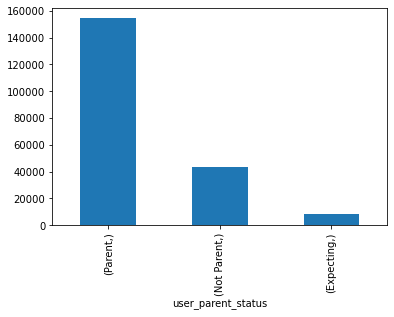

In [94]:
# I think I'll use pie charts to show them off.
patent_pie=parental_status.value_counts().plot.bar()

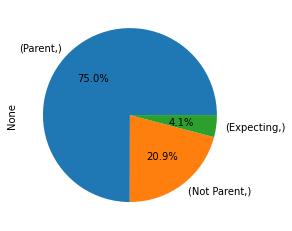

In [95]:
# There are never more than 3 categories so a pie chart should shine here
# I found a way to show percentages let's take a look at that.
# autopct = auto percent, and the number after the period is how many placed out from the decimal it'll go
parent_pie=parental_status.value_counts().plot.pie(autopct="%.1f%%")

In [96]:
parent_pie.figure.savefig(os.path.join(viz_path,'parent_pie.png'))

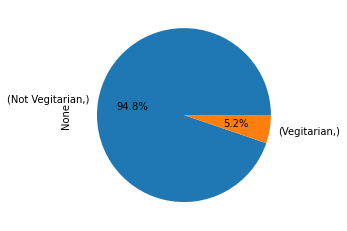

In [97]:
#Cool beans, that's pretty perfect. I'll keep using it as it's a pretty clear representation of the groups
#the percentages are very helpful too. How exciting
diet_pie=diet.value_counts().plot.pie(autopct='%.1f%%')

In [98]:
diet_pie.figure.savefig(os.path.join(viz_path,'diet_pie.png'))

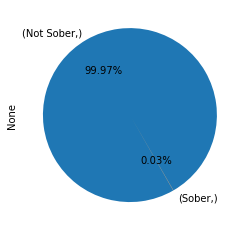

In [163]:
# when I ran this the first time the 'Not Sober' label overlapped with the title, so I used startangle to move shift it around a little
sobriety_pie=sobriety.value_counts().plot.pie(startangle=300,autopct='%.2f%%')
# a lot of people drink

In [164]:
sobriety_pie.figure.savefig(os.path.join(viz_path,'sobriety_pie.png'))

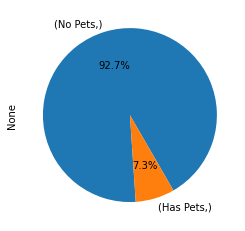

In [101]:
pet_pie=pet.value_counts().plot.pie(startangle=300,autopct='%.1f%%')
#I'm really surprised by this one, I was expecting a much biger chunk of people to have pets!

In [102]:
pet_pie.figure.savefig(os.path.join(viz_path,'pet_pie.png'))

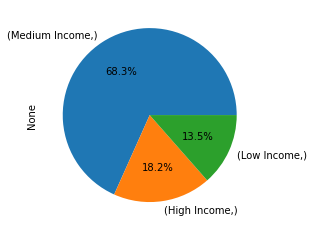

In [103]:
income_pie=income_level.value_counts().plot.pie(autopct='%.1f%%')

In [104]:
income_pie.figure.savefig(os.path.join(viz_path,'income_pie.png'))

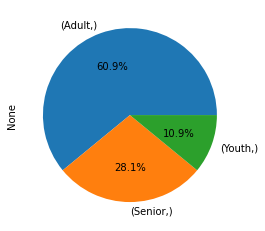

In [105]:
age_pie=age_group.value_counts().plot.pie(autopct='%.1f%%')

In [106]:
age_pie.figure.savefig(os.path.join(viz_path,'age_pie.png'))

### #7 MAX's MEAN MINions

In [107]:
#it might end up a little tricky to clearly see where order number ends and prices starts but this should work fine
df.groupby('user_parent_status').agg({'days_since_prior_order':['max','mean','min'],'prices':['max','mean','min']})

days_since_prior_order                 prices            \
                                      max       mean  min    max      mean   
user_parent_status                                                           
Expecting                            30.0   9.005215  0.0   25.0  7.835498   
Not Parent                           30.0  10.980216  0.0   25.0  7.769702   
Parent                               30.0  10.399515  0.0   25.0  7.791334   

                         
                    min  
user_parent_status       
Expecting           1.0  
Not Parent          1.0  
Parent              1.0

In [108]:
df.groupby('user_diet').agg({'days_since_prior_order':['max','mean','min'],'prices':['max','mean','min']})

days_since_prior_order                 prices               
                                  max       mean  min    max      mean  min
user_diet                                                                  
Not Vegitarian                   30.0  10.368273  0.0   25.0  7.798171  1.0
Vegitarian                       30.0  13.082284  0.0   20.0  6.996154  1.0

In [109]:
df.groupby('user_sobriety').agg({'days_since_prior_order':['max','mean','min'],'prices':['max','mean','min']})

days_since_prior_order                 prices               
                                 max       mean  min    max      mean  min
user_sobriety                                                             
Not Sober                       30.0  10.392518  0.0   25.0  7.790990  1.0
Sober                           30.0  12.304045  0.0   15.0  7.993305  1.0

In [110]:
df.groupby('user_pets').agg({'days_since_prior_order':['max','mean','min'],'prices':['max','mean','min']})

days_since_prior_order                 prices               
                             max       mean  min    max      mean  min
user_pets                                                             
Has Pets                    30.0   9.795180  0.0   25.0  7.812556  1.0
No Pets                     30.0  10.465538  0.0   25.0  7.788360  1.0

In [111]:
df.groupby('user_income_level').agg({'days_since_prior_order':['max','mean','min'],'prices':['max','mean','min']})

days_since_prior_order                 prices               
                                     max       mean  min    max      mean  min
user_income_level                                                             
High Income                         30.0  10.327302  0.0   25.0  7.953783  1.0
Low Income                          30.0  10.756247  0.0   25.0  6.629537  1.0
Medium Income                       30.0  10.365335  0.0   25.0  7.890622  1.0

In [112]:
df.groupby('user_age_group').agg({'days_since_prior_order':['max','mean','min'],'prices':['max','mean','min']})

days_since_prior_order                 prices               
                                  max       mean  min    max      mean  min
user_age_group                                                             
Adult                            30.0  10.416668  0.0   25.0  7.789409  1.0
Senior                           30.0  10.357270  0.0   25.0  7.794478  1.0
Youth                            30.0  10.349357  0.0   25.0  7.790869  1.0

### #8 Regions and Departments

In [113]:
#Now we'll look at the regional distrubition and what departments are prefred by the various groups we set up
#we'll go region and then department with each
#first up is parents
parent_regions=pd.crosstab(df['user_region'],df['user_parent_status'],dropna=False)

In [114]:
parent_regions

user_parent_status,Expecting,Not Parent,Parent
user_region,,,
Region 1,395575,871529,3827189
Region 2,557786,1193818,5210812
Region 3,816446,1874837,8095785
Region 4,625239,1446823,6219617


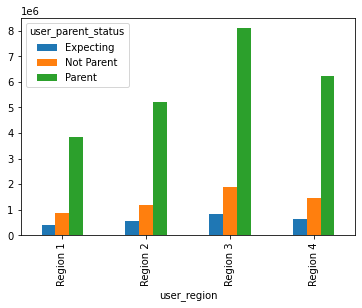

In [115]:
parent_reg_bar=parent_regions.plot.bar()

In [116]:
parent_reg_bar.figure.savefig(os.path.join(viz_path,'parent_regions.png'))

In [117]:
parent_department=pd.crosstab(df['department_id'],df['user_parent_status'],dropna=False)

In [118]:
parent_department

user_parent_status,Expecting,Not Parent,Parent
department_id,,,
1,168691,388469,1677583
2,3093,6082,27116
3,93711,200694,878023
4,711645,1663800,7103846
5,6221,32897,114578
6,19850,47863,201540
7,166048,508394,2013681
8,6414,18169,73133
9,74379,140883,651365


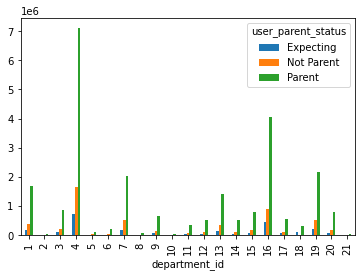

In [119]:
parent_dep_bar=parent_department.plot.bar()

In [120]:
parent_dep_bar.figure.savefig(os.path.join(viz_path,'parent_dep_bar.png'))

In [121]:
diet_regions=pd.crosstab(df['user_region'],df['user_diet'],dropna=False)

In [122]:
diet_regions

user_diet,Not Vegitarian,Vegitarian
user_region,,
Region 1,5048593,45700
Region 2,6900154,62262
Region 3,10691722,95346
Region 4,8216121,75558


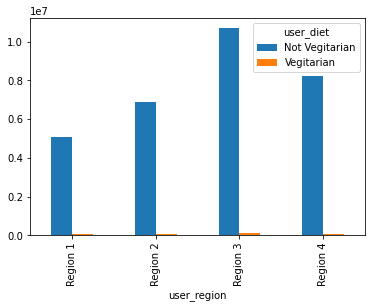

In [123]:
diet_reg_bar=diet_regions.plot.bar()

In [124]:
diet_reg_bar.figure.savefig(os.path.join(viz_path,'diet_reg_bar.png'))

In [125]:
diet_department=pd.crosstab(df['department_id'],df['user_diet'],dropna=False)

In [126]:
diet_department

user_diet,Not Vegitarian,Vegitarian
department_id,,
1,2219085,15658
2,35509,782
3,1167730,4698
4,9391817,87474
5,142746,10950
6,268160,1093
7,2627315,60808
8,96696,1020
9,864308,2319


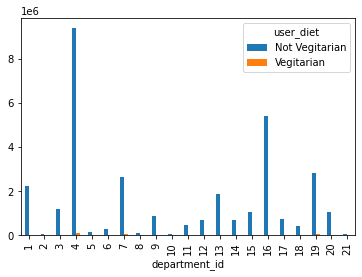

In [127]:
diet_dep_bar=diet_department.plot.bar()

In [128]:
diet_dep_bar.figure.savefig(os.path.join(viz_path,'diet_dep_bar'))

In [129]:
sober_regions=pd.crosstab(df['user_region'],df['user_sobriety'],dropna=False)

In [130]:
sober_regions

user_sobriety,Not Sober,Sober
user_region,,
Region 1,5094203,90
Region 2,6962236,180
Region 3,10786850,218
Region 4,8291492,187


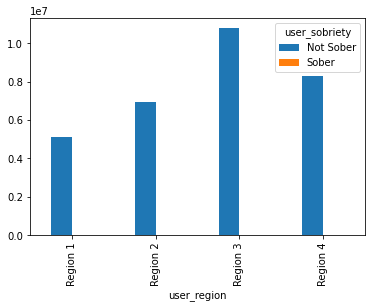

In [131]:
sob_reg_bar=sober_regions.plot.bar()

In [132]:
sob_reg_bar.figure.savefig(os.path.join(viz_path,'sober_reg_bar.png'))

In [133]:
sober_department=pd.crosstab(df['department_id'],df['user_sobriety'],dropna=False)

In [134]:
sober_department

user_sobriety,Not Sober,Sober
department_id,,
1,2234743,0
2,36291,0
3,1172428,0
4,9479291,0
5,152979,717
6,269253,0
7,2688123,0
8,97716,0
9,866627,0


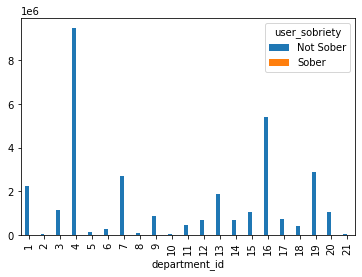

In [135]:
sob_dep_bar=sober_department.plot.bar()

In [136]:
sob_dep_bar.figure.savefig(os.path.join(viz_path,'sober_dep_bar.png'))

In [137]:
pet_regions=pd.crosstab(df['user_region'],df['user_pets'],dropna=False)

In [138]:
pet_regions

user_pets,Has Pets,No Pets
user_region,,
Region 1,542298,4551995
Region 2,772343,6190073
Region 3,1137657,9649411
Region 4,929174,7362505


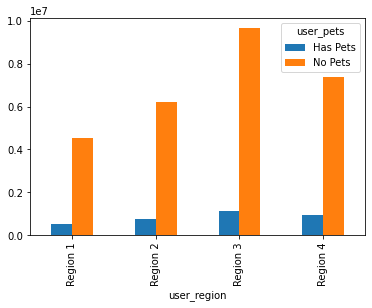

In [139]:
pet_reg=pet_regions.plot.bar()

In [140]:
pet_reg.figure.savefig(os.path.join(viz_path,'pet_reg.png'))

In [141]:
pet_department=pd.crosstab(df['department_id'],df['user_pets'],dropna=False)

In [142]:
pet_department

user_pets,Has Pets,No Pets
department_id,,
1,286518,1948225
2,5319,30972
3,140739,1031689
4,783599,8695692
5,27250,126446
6,31635,237618
7,326092,2362031
8,97716,0
9,102733,763894


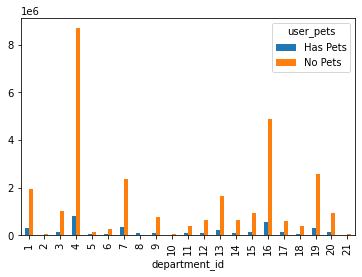

In [143]:
pet_dep_bar=pet_department.plot.bar()

In [144]:
pet_dep_bar.figure.savefig(os.path.join(viz_path,'pet_dep_bar.png'))

In [145]:
income_regions=pd.crosstab(df['user_region'],df['user_income_level'],dropna=False)

In [146]:
income_regions

user_income_level,High Income,Low Income,Medium Income
user_region,,,
Region 1,1021343,453594,3619356
Region 2,1392926,609144,4960346
Region 3,2110979,975222,7700867
Region 4,1641747,735918,5914014


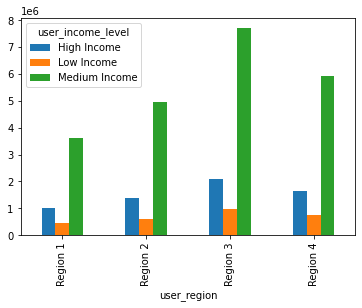

In [147]:
inc_reg_bar=income_regions.plot.bar()

In [148]:
inc_reg_bar.figure.savefig(os.path.join(viz_path,'income_reg_bar.png'))

In [149]:
income_department=pd.crosstab(df['department_id'],df['user_income_level'],dropna=False)

In [150]:
income_department

user_income_level,High Income,Low Income,Medium Income
department_id,,,
1,452594,187158,1594991
2,7301,3413,25577
3,242160,90593,839675
4,1888416,698175,6892700
5,35476,15915,102305
6,54787,18493,195973
7,513632,329319,1845172
8,20642,7816,69258
9,177694,56034,632899


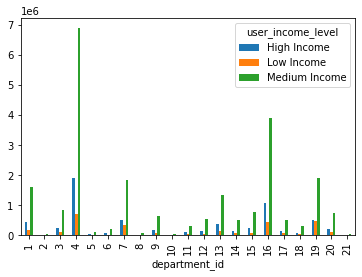

In [151]:
inc_dep_bar=income_department.plot.bar()

In [152]:
inc_dep_bar.figure.savefig(os.path.join(viz_path,'income_dep_bar.png'))

In [153]:
age_regions=pd.crosstab(df['user_region'],df['user_age_group'],dropna=False)

In [154]:
age_regions

user_age_group,Adult,Senior,Youth
user_region,,,
Region 1,3073575,1454323,566395
Region 2,4257334,1944528,760554
Region 3,6564733,3009477,1212858
Region 4,5063658,2331457,896564


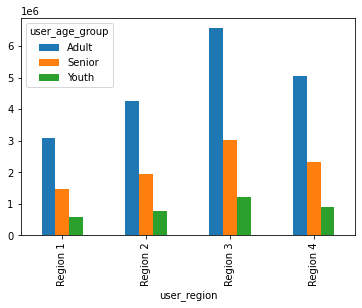

In [155]:
age_reg_bar=age_regions.plot.bar()

In [156]:
age_reg_bar.figure.savefig(os.path.join(viz_path,'age_reg_bar.png'))

In [157]:
age_department=pd.crosstab(df['department_id'],df['user_age_group'],dropna=False)

In [158]:
age_department

user_age_group,Adult,Senior,Youth
department_id,,,
1,1357836,630538,246369
2,22143,10048,4100
3,714109,329013,129306
4,5771060,2665060,1043171
5,93890,41249,18557
6,164050,75130,30073
7,1636333,759786,292004
8,58304,27487,11925
9,527094,242882,96651


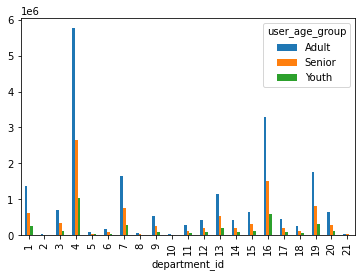

In [159]:
age_dep_bar=age_department.plot.bar()

In [160]:
age_dep_bar.figure.savefig(os.path.join(viz_path,'age_dep_bar'))

In [161]:
#ok, and now the final step, the pickle.
df.to_pickle(os.path.join(path,'02 Data','Preped Data','Ords_Prods_Cust_Final.pkl'))